### Problem Statement:
Predicitng Google stock Prices based on previous year data.

This involves Time Series forecasting methods

### Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Google Stock Price Prediction using RNN\Google_Stock_Price_Train.csv')
train_data = data.copy()

### Selecting the Feature Variable for Prediction

In [2]:
train_data = train_data.loc[:, ['Open']]

### Normalizing the Data

In [3]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

train_data = mms.fit_transform(train_data)

### Splitting the Data

In [4]:
x_train = []

y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Model Creation

In [5]:
rnn = tf.keras.models.Sequential()

rnn.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))

rnn.add(tf.keras.layers.Dropout(0.2))

rnn.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

rnn.add(tf.keras.layers.Dropout(0.2))

rnn.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

rnn.add(tf.keras.layers.Dropout(0.2))

rnn.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

rnn.add(tf.keras.layers.Dropout(0.2))

rnn.add(tf.keras.layers.LSTM(units=50))

rnn.add(tf.keras.layers.Dropout(0.2))

rnn.add(tf.keras.layers.Dense(units=1))

rnn.compile(optimizer='adam', loss='mean_squared_error')

rnn.fit(x_train, y_train, epochs=2, batch_size=32)

Epoch 1/2
38/38 [==============================] - 100s 809ms/step - loss: 0.0425
Epoch 2/2
38/38 [==============================] - 35s 929ms/step - loss: 0.0077


### Model Evaluation

In [6]:
dl_test = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Google Stock Price Prediction using RNN\Google_Stock_Price_Test.csv')

test_data = dl_test.copy()

test_data = test_data.loc[:, ['Open']]

additional_data = data.copy()

additional_data = additional_data.tail(60)

additional_data = additional_data.loc[:, ['Open']]


test_set = pd.concat((additional_data, test_data), axis=0)

test_set = mms.transform(test_set)

In [7]:
x_test = []

for i in range(60, len(test_set)):
    x_test.append(test_set[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
results = rnn.predict(x_test)

real_results = mms.inverse_transform(results)

### Visualizing the Result

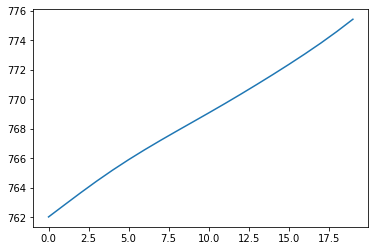

In [8]:
import matplotlib.pyplot as plt

plt.plot(real_results)
plt.show()